<a href="https://colab.research.google.com/github/HabibaShera/LangChain-Basics/blob/main/LangChain_Output_Parsing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langchain langchain-openai -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.4/63.4 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.4/438.4 kB 5.4 MB/s eta 0:00:00


In [2]:
from langchain_openai import ChatOpenAI
from langchain.prompts import ChatPromptTemplate

In [3]:
import getpass
import os

key = getpass.getpass("Enter you Secret API Key:")

Enter you Secret API Key:··········


## Case 1

In [30]:
customer_review = """\
This leaf blower is pretty amazing.  It has four settings:\
candle blower, gentle breeze, windy city, and tornado. \
It arrived in two days, just in time for my wife's \
anniversary present. \
I think my wife liked it so much she was speechless. \
So far I've been the only one using it, and I've been \
using it every other morning to clear the leaves on our lawn. \
It's slightly more expensive than the other leaf blowers \
out there, but I think it's worth it for the extra features.
"""

review_template = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product \
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

Format the output as JSON with the following keys:
gift
delivery_days
price_value

text: {text}
"""

In [31]:
prompt_template = ChatPromptTemplate.from_template(review_template)
print(prompt_template)

input_variables=['text'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the product to arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\nFormat the output as JSON with the following keys:\ngift\ndelivery_days\nprice_value\n\ntext: {text}\n'), additional_kwargs={})]


In [4]:
gemma_model = ChatOpenAI(
    openai_api_key=key,
    openai_api_base="https://openrouter.ai/api/v1",
    model="google/gemma-3n-e4b-it:free",
    temperature=0.0,
)

In [7]:
messages = prompt_template.format_messages(text=customer_review)
response = gemma_model(messages)

<ipython-input-7-a3e752576580>:2: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = gemma_model(messages)


In [8]:
print(response.content)

```json
{
  "gift": true,
  "delivery_days": 2,
  "price_value": [
    "It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."
  ]
}
```


In [9]:
type(response.content)

str

>NOTE: We already define the output format which is JSON, but what found is str

In [33]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser


gift_schema = ResponseSchema(name="gift",
                             description="Was the item purchased\
                             as a gift for someone else? \
                             Answer True if yes,\
                             False if not or unknown.")
delivery_days_schema = ResponseSchema(name="delivery_days",
                                      description="How many days\
                                      did it take for the product\
                                      to arrive? If this \
                                      information is not found,\
                                      output -1.")
price_value_schema = ResponseSchema(name="price_value",
                                    description="Extract any\
                                    sentences about the value or \
                                    price, and output them as a \
                                    comma separated Python list.")

response_schemas = [gift_schema,
                    delivery_days_schema,
                    price_value_schema]

In [34]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"gift": string  // Was the item purchased                             as a gift for someone else?                              Answer True if yes,                             False if not or unknown.
	"delivery_days": string  // How many days                                      did it take for the product                                      to arrive? If this                                       information is not found,                                      output -1.
	"price_value": string  // Extract any                                    sentences about the value or                                     price, and output them as a                                     comma separated Python list.
}
```


In [35]:
review_template_2 = """\
For the following text, extract the following information:

gift: Was the item purchased as a gift for someone else? \
Answer True if yes, False if not or unknown.

delivery_days: How many days did it take for the product\
to arrive? If this information is not found, output -1.

price_value: Extract any sentences about the value or price,\
and output them as a comma separated Python list.

text: {text}

{format_instructions}
"""

prompt = ChatPromptTemplate.from_template(template=review_template_2)

messages = prompt.format_messages(text=customer_review,
                                format_instructions=format_instructions)

In [36]:
messages

[HumanMessage(content='For the following text, extract the following information:\n\ngift: Was the item purchased as a gift for someone else? Answer True if yes, False if not or unknown.\n\ndelivery_days: How many days did it take for the productto arrive? If this information is not found, output -1.\n\nprice_value: Extract any sentences about the value or price,and output them as a comma separated Python list.\n\ntext: This leaf blower is pretty amazing.  It has four settings:candle blower, gentle breeze, windy city, and tornado. It arrived in two days, just in time for my wife\'s anniversary present. I think my wife liked it so much she was speechless. So far I\'ve been the only one using it, and I\'ve been using it every other morning to clear the leaves on our lawn. It\'s slightly more expensive than the other leaf blowers out there, but I think it\'s worth it for the extra features.\n\n\nThe output should be a markdown code snippet formatted in the following schema, including the 

In [37]:
response = gemma_model(messages)

In [38]:
print(response.content)

```json
{
	"gift": "True",
	"delivery_days": "2",
	"price_value": "It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."
}
```


In [39]:
print(type(response.content))

<class 'str'>


In [40]:
final_output = output_parser.parse(response.content)
final_output

{'gift': 'True',
 'delivery_days': '2',
 'price_value': "It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."}

In [41]:
final_output.get('price_value')

"It's slightly more expensive than the other leaf blowers out there, but I think it's worth it for the extra features."

# Case 2

In [5]:
from langchain.output_parsers import ResponseSchema
from langchain.output_parsers import StructuredOutputParser


review_schema = ResponseSchema(name="review", description="customer review")
sentiment_schema = ResponseSchema(name="sentiment", description="sentiment analysis for the customer review, Is that positive or negative or neutral?")
response_schemas = [review_schema,
                    sentiment_schema]

In [6]:
output_parser = StructuredOutputParser.from_response_schemas(response_schemas)
format_instructions = output_parser.get_format_instructions()
print(format_instructions)

The output should be a markdown code snippet formatted in the following schema, including the leading and trailing "```json" and "```":

```json
{
	"review": string  // customer review
	"sentiment": string  // sentiment analysis for the customer review, Is that positive or negative or neutral?
}
```


In [7]:
main_prompt = """Determine the sentiment (positive, negative, or neutral) for each of the following customer reviews.
Output a JSON format where each item has the following keys:
- review: the original customer review
- sentiment: the sentiment analysis result

Reviews:
{reviews}

{format_instructions}
"""

In [8]:
prompt_template = ChatPromptTemplate.from_template(main_prompt)
print(prompt_template)

input_variables=['format_instructions', 'reviews'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['format_instructions', 'reviews'], input_types={}, partial_variables={}, template='Determine the sentiment (positive, negative, or neutral) for each of the following customer reviews.\nOutput a JSON format where each item has the following keys:\n- review: the original customer review\n- sentiment: the sentiment analysis result\n\nReviews:\n{reviews}\n\n{format_instructions}\n'), additional_kwargs={})]


In [9]:
customer_reviews = [
    "Absolutely loved this book! The plot twists kept me hooked till the last page.",
    "The story started off strong but got a bit slow in the middle. Still a decent read.",
    "Not what I expected. Characters felt flat and the ending was rushed.",
    "I bought this as a gift for my sister and she couldn't put it down. Worth every penny!",
    "Took a while to arrive, but the book was in great condition and the content was excellent.",
    "The price was a bit high compared to similar books, but the writing quality justifies it.",
    "This book changed my perspective on so many things. Highly recommended for deep thinkers.",
    "Some typos here and there, but the overall message and storytelling were beautiful.",
    "A friend recommended this and I wasn't disappointed. Finished it in two days!",
    "Too much filler content. Could have been half the length and just as effective."
]

In [10]:
messages = prompt_template.format_messages(reviews=customer_reviews, format_instructions=format_instructions)
print(messages)

[HumanMessage(content='Determine the sentiment (positive, negative, or neutral) for each of the following customer reviews.\nOutput a JSON format where each item has the following keys:\n- review: the original customer review\n- sentiment: the sentiment analysis result\n\nReviews:\n[\'Absolutely loved this book! The plot twists kept me hooked till the last page.\', \'The story started off strong but got a bit slow in the middle. Still a decent read.\', \'Not what I expected. Characters felt flat and the ending was rushed.\', "I bought this as a gift for my sister and she couldn\'t put it down. Worth every penny!", \'Took a while to arrive, but the book was in great condition and the content was excellent.\', \'The price was a bit high compared to similar books, but the writing quality justifies it.\', \'This book changed my perspective on so many things. Highly recommended for deep thinkers.\', \'Some typos here and there, but the overall message and storytelling were beautiful.\', "A 

In [11]:
response = gemma_model(messages)

<ipython-input-11-d33ba93d5365>:1: LangChainDeprecationWarning: The method `BaseChatModel.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = gemma_model(messages)


In [12]:
print(response.content)

```json
[
  {
    "review": "Absolutely loved this book! The plot twists kept me hooked till the last page.",
    "sentiment": "positive"
  },
  {
    "review": "The story started off strong but got a bit slow in the middle. Still a decent read.",
    "sentiment": "neutral"
  },
  {
    "review": "Not what I expected. Characters felt flat and the ending was rushed.",
    "sentiment": "negative"
  },
  {
    "review": "I bought this as a gift for my sister and she couldn't put it down. Worth every penny!",
    "sentiment": "positive"
  },
  {
    "review": "Took a while to arrive, but the book was in great condition and the content was excellent.",
    "sentiment": "positive"
  },
  {
    "review": "The price was a bit high compared to similar books, but the writing quality justifies it.",
    "sentiment": "positive"
  },
  {
    "review": "This book changed my perspective on so many things. Highly recommended for deep thinkers.",
    "sentiment": "positive"
  },
  {
    "review": "Some

> In the previous case, we can't use `output_parser.parse(response.content)` because it will raise the following error:
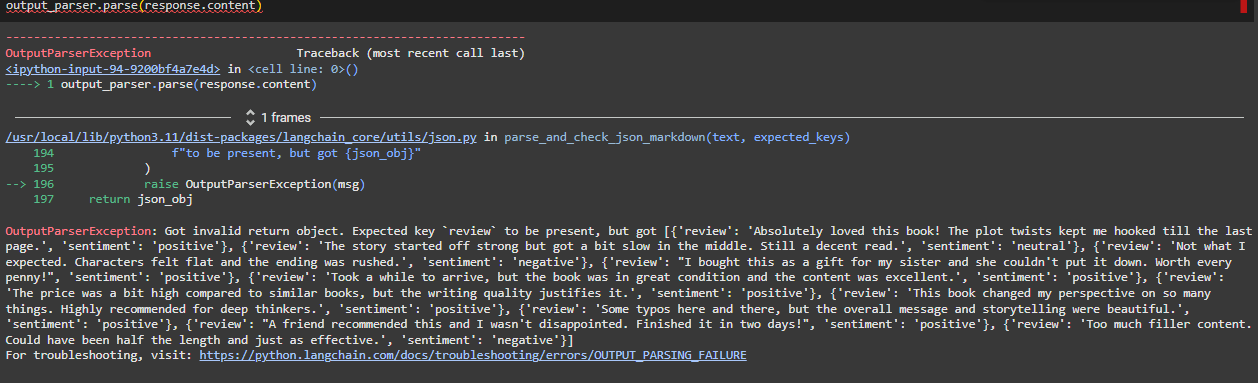
which means `output_parser.parse` expect a single object with keys [review, sentiment] not list

In [15]:
import re

# extract only list from json format using re
output = re.search(r'\[.*\]', response.content, re.DOTALL)
output

<re.Match object; span=(8, 1381), match='[\n  {\n    "review": "Absolutely loved this book>

In [16]:
print(output.group())

[
  {
    "review": "Absolutely loved this book! The plot twists kept me hooked till the last page.",
    "sentiment": "positive"
  },
  {
    "review": "The story started off strong but got a bit slow in the middle. Still a decent read.",
    "sentiment": "neutral"
  },
  {
    "review": "Not what I expected. Characters felt flat and the ending was rushed.",
    "sentiment": "negative"
  },
  {
    "review": "I bought this as a gift for my sister and she couldn't put it down. Worth every penny!",
    "sentiment": "positive"
  },
  {
    "review": "Took a while to arrive, but the book was in great condition and the content was excellent.",
    "sentiment": "positive"
  },
  {
    "review": "The price was a bit high compared to similar books, but the writing quality justifies it.",
    "sentiment": "positive"
  },
  {
    "review": "This book changed my perspective on so many things. Highly recommended for deep thinkers.",
    "sentiment": "positive"
  },
  {
    "review": "Some typos h

In [18]:
# Another way is manual parsing
import json
final_output = json.loads(output.group())
final_output

[{'review': 'Absolutely loved this book! The plot twists kept me hooked till the last page.',
  'sentiment': 'positive'},
 {'review': 'The story started off strong but got a bit slow in the middle. Still a decent read.',
  'sentiment': 'neutral'},
 {'review': 'Not what I expected. Characters felt flat and the ending was rushed.',
  'sentiment': 'negative'},
 {'review': "I bought this as a gift for my sister and she couldn't put it down. Worth every penny!",
  'sentiment': 'positive'},
 {'review': 'Took a while to arrive, but the book was in great condition and the content was excellent.',
  'sentiment': 'positive'},
 {'review': 'The price was a bit high compared to similar books, but the writing quality justifies it.',
  'sentiment': 'positive'},
 {'review': 'This book changed my perspective on so many things. Highly recommended for deep thinkers.',
  'sentiment': 'positive'},
 {'review': 'Some typos here and there, but the overall message and storytelling were beautiful.',
  'sentimen

In [21]:
final_output[5].get('sentiment')

'positive'